In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = r"C:\Users\sammu\Downloads\Task 1 YouTube Streamer Analysis\youtubers_df.csv"
youtubers_df = pd.read_csv(file_path)

In [5]:
print(youtubers_df.head())      # Display the first 5 rows
print(youtubers_df.info())      # Data types and null counts
print(youtubers_df.describe())  # Summary statistics for numerical columns

   Rank       Username           Categories   Suscribers         Country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia                  NaN  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        Visits      Likes  Comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk

In [7]:
print(youtubers_df.isnull().sum())  # Display the count of missing values in each column

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64


In [17]:
# Rename the 'Suscribers' column to 'Subscribers' for consistency
youtubers_df.rename(columns={'Suscribers': 'Subscribers'}, inplace=True)

# Fill missing values with the median
for col in ['Subscribers', 'Visits', 'Likes', 'Comments']:
    if col in youtubers_df.columns:
        youtubers_df[col].fillna(youtubers_df[col].median(), inplace=True)
    else:
        print(f"Column '{col}' is missing.")


In [19]:
for col in ['Suscribers', 'Visits', 'Likes', 'Comments']:
    if col in youtubers_df.columns:
        youtubers_df[col].fillna(youtubers_df[col].median(), inplace=True)
    else:
        print(f"Column '{col}' is missing.")


Column 'Suscribers' is missing.


In [21]:
for col in ['Subscribers', 'Visits', 'Likes', 'Comments']:
    if col in youtubers_df.columns:
        youtubers_df[col].fillna(youtubers_df[col].median(), inplace=True)
    else:
        print(f"Column '{col}' is missing.")


In [23]:
print(youtubers_df.columns)

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')


In [27]:
youtubers_df['Country'].fillna(youtubers_df['Country'].mode()[0], inplace=True)

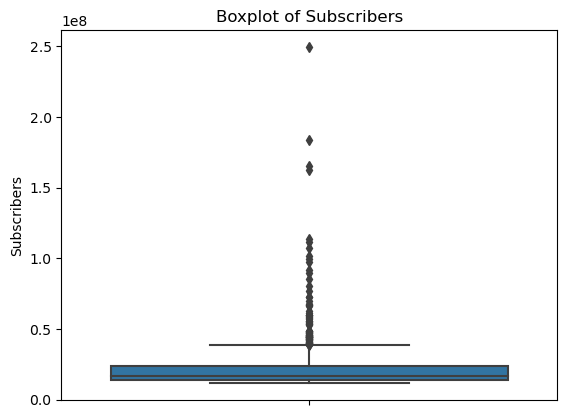

In [31]:
sns.boxplot(y=youtubers_df['Subscribers'])
plt.title("Boxplot of Subscribers")
plt.show()

Categories
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor                   6
Juguetes, Coches y vehí

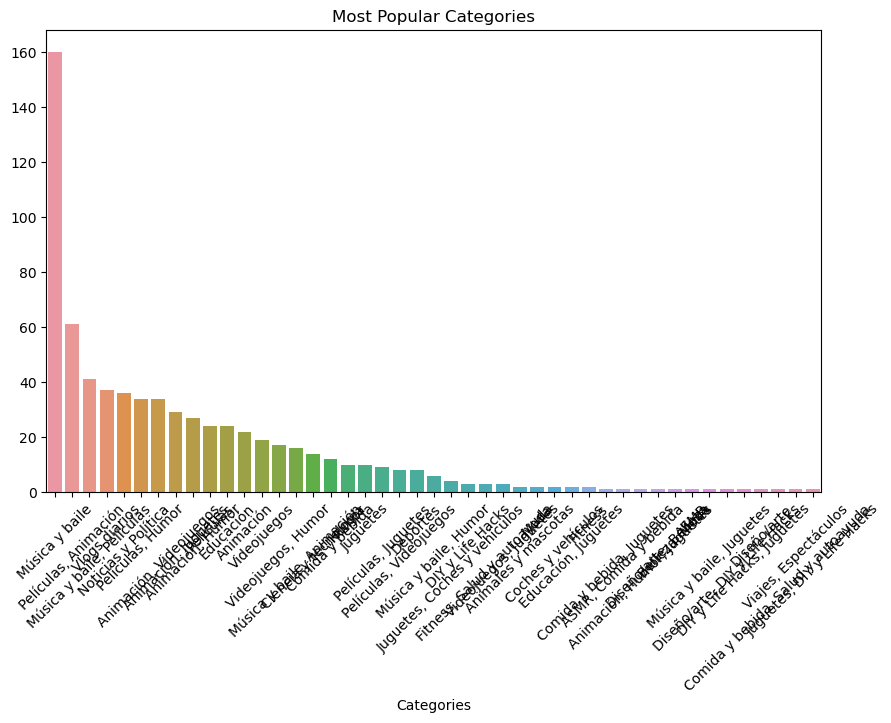

In [33]:
popular_categories = youtubers_df['Categories'].value_counts()
print(popular_categories)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_categories.index, y=popular_categories.values)
plt.xticks(rotation=45)
plt.title("Most Popular Categories")
plt.show()

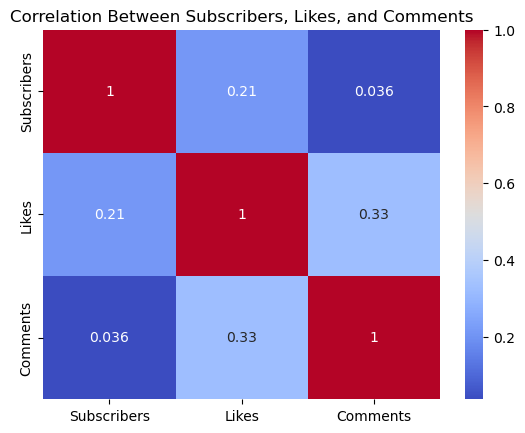

In [35]:
correlation_matrix = youtubers_df[['Subscribers', 'Likes', 'Comments']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Subscribers, Likes, and Comments")
plt.show()

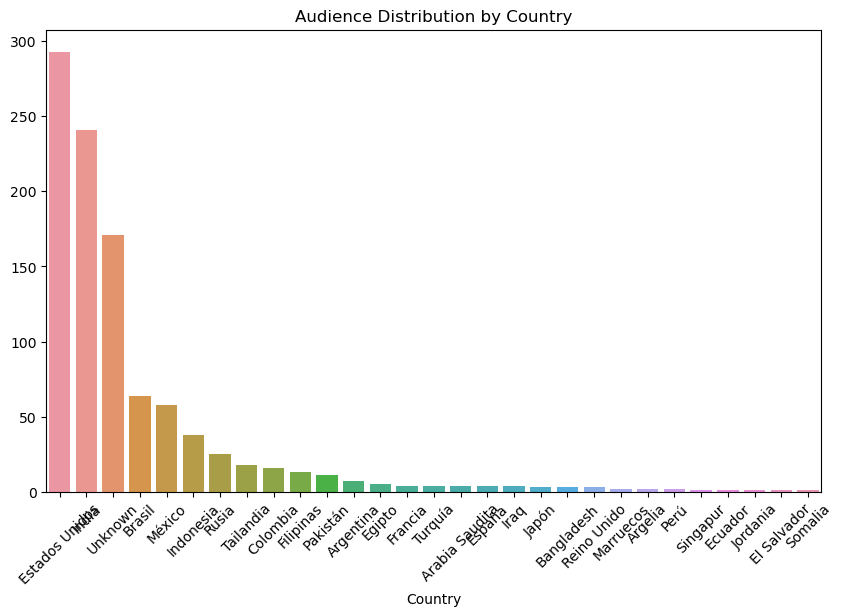

In [91]:
audience_distribution = youtubers_df['Country'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=audience_distribution.index, y=audience_distribution.values)
plt.xticks(rotation=45)
plt.title("Audience Distribution by Country")
plt.show()
# Visualization

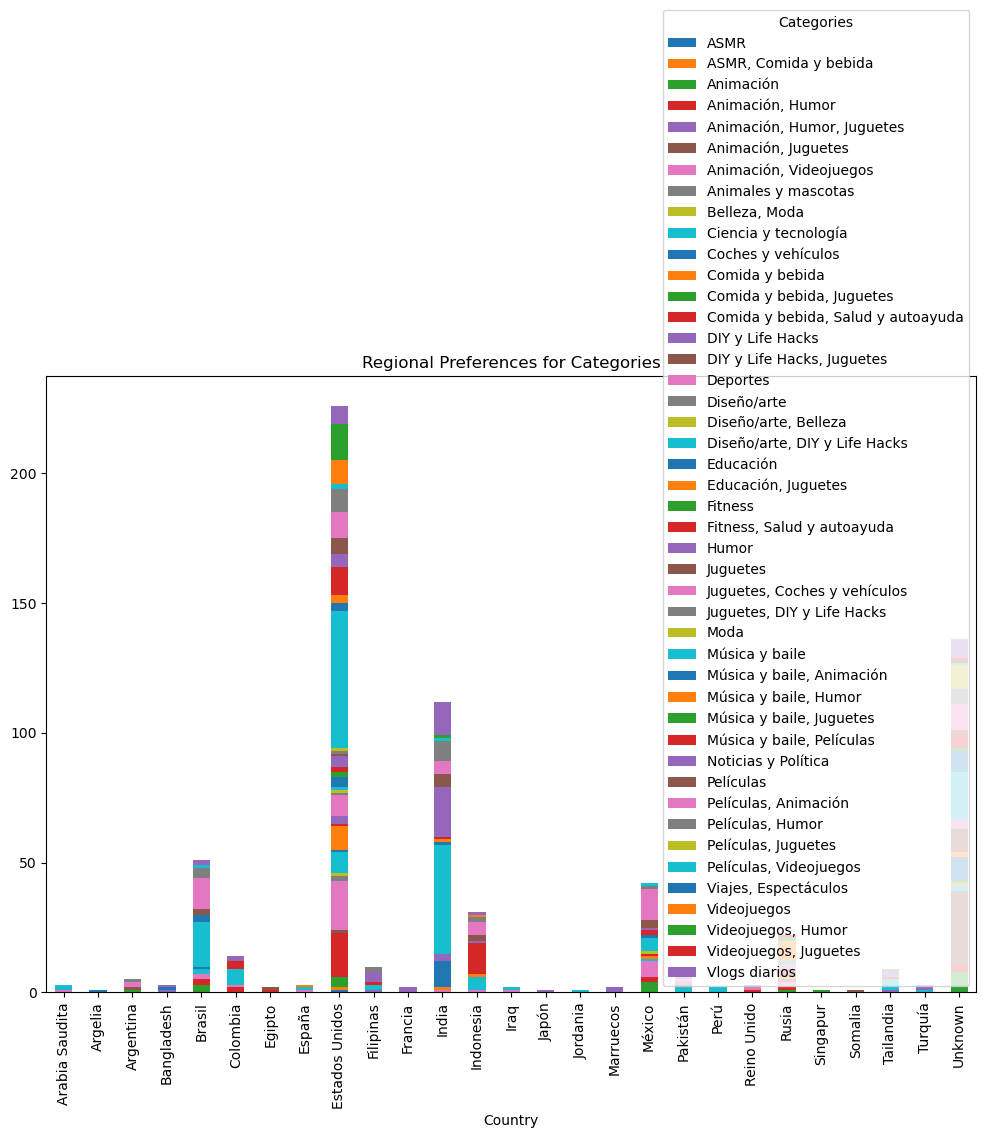

In [39]:
regional_preferences = youtubers_df.groupby(['Country', 'Categories']).size().unstack()
regional_preferences.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Regional Preferences for Categories")
plt.show()


Subscribers    2.189440e+07
Visits         1.209446e+06
Likes          5.363259e+04
Comments       1.288768e+03
dtype: float64


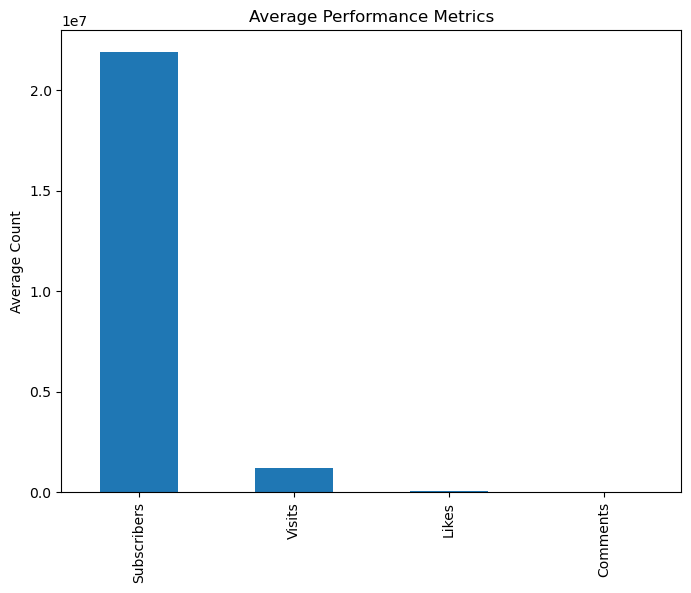

In [41]:
metrics = youtubers_df[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()
print(metrics)

# Visualization
metrics.plot(kind='bar', title="Average Performance Metrics", figsize=(8, 6))
plt.ylabel("Average Count")
plt.show()


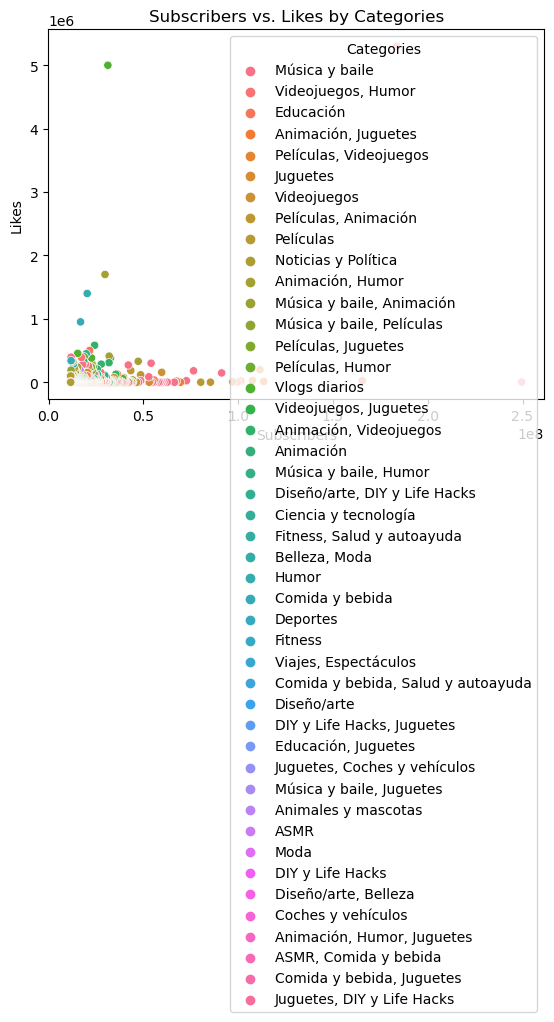

In [45]:
sns.scatterplot(data=youtubers_df, x='Subscribers', y='Likes', hue='Categories')
plt.title("Subscribers vs. Likes by Categories")
plt.show()

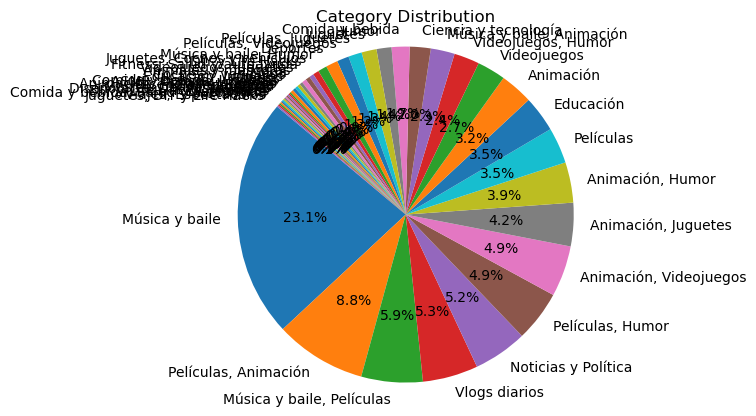

In [47]:
category_distribution = youtubers_df['Categories'].value_counts()

# Visualization
plt.pie(category_distribution.values, labels=category_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title("Category Distribution")
plt.axis('equal')
plt.show()


In [49]:
exceptional_categories = youtubers_df.groupby('Categories')[['Subscribers', 'Likes', 'Comments']].mean()
print(exceptional_categories.sort_values(by='Subscribers', ascending=False))

                                     Subscribers          Likes     Comments
Categories                                                                  
Juguetes                            3.788000e+07    5290.200000     2.800000
Películas, Videojuegos              3.325000e+07   48083.375000  1569.500000
Animación, Juguetes                 2.937586e+07    2653.068966     0.517241
Videojuegos, Humor                  2.876471e+07  420511.764706  4827.058824
Música y baile                      2.683688e+07   17405.681250  1998.931250
Diseño/arte, DIY y Life Hacks       2.570000e+07  127300.000000  2200.000000
Educación                           2.501250e+07   45060.750000  1537.250000
Videojuegos                         2.498421e+07   57121.052632  1760.157895
Videojuegos, Juguetes               2.473333e+07    6400.000000   337.000000
Belleza, Moda                       2.390000e+07   62300.000000  1100.000000
Películas, Animación                2.269344e+07   25671.016393   645.655738

In [55]:
# Filter high-performance YouTubers
high_performance = youtubers_df[youtubers_df['Subscribers'] > youtubers_df['Subscribers'].mean()]

# Print selected columns
print(high_performance[['Username', 'Subscribers']])  # Adjust as needed

             Username  Subscribers
0             tseries  249500000.0
1             MrBeast  183500000.0
2           CoComelon  165500000.0
3            SETIndia  162600000.0
4       KidsDianaShow  113500000.0
..                ...          ...
298       williesalim   21900000.0
299     SMOL_official   21900000.0
300      alfredolarin   21900000.0
301  TlnovelasOficial   21900000.0
302        royaltyfam   21900000.0

[303 rows x 2 columns]


In [63]:
youtubers_df['brands_collaborated'] = None  # or any default value

In [65]:
top_performers = youtubers_df[(youtubers_df['Subscribers'] > youtubers_df['Subscribers'].mean()) & 
                              (youtubers_df['Likes'] > youtubers_df['Likes'].mean()) & 
                              (youtubers_df['Comments'] > youtubers_df['Comments'].mean())]

print(top_performers[['Username', 'Subscribers', 'Likes', 'Comments']])


                  Username  Subscribers      Likes  Comments
1                  MrBeast  183500000.0  5300000.0   18500.0
5                PewDiePie  111500000.0   197300.0    4900.0
10               BLACKPINK   91300000.0   146900.0    3400.0
14                     BTS   76500000.0   180300.0    7400.0
26             dudeperfect   59700000.0   156500.0    4200.0
34             TaylorSwift   54100000.0   300400.0   15000.0
37            ArianaGrande   52900000.0    85800.0    3800.0
39             JuegaGerman   48600000.0   117100.0    3000.0
43                A4a4a4a4   47300000.0   330400.0   22000.0
58               Mikecrack   43400000.0   183400.0    1800.0
62          KimberlyLoaiza   42100000.0   271300.0   16000.0
64         luisitocomunica   41100000.0   128900.0    1800.0
70             JessNoLimit   39600000.0    73500.0    1600.0
96          TotalGaming093   36300000.0   129400.0    4900.0
98    TechnoGamerzOfficial   35600000.0   341800.0   16500.0
100             markipli

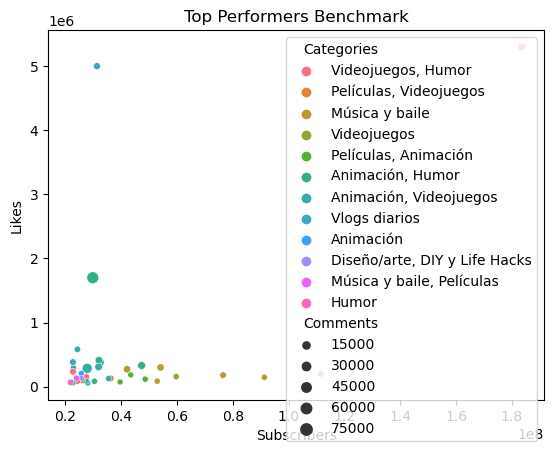

In [67]:
sns.scatterplot(data=top_performers, x='Subscribers', y='Likes', size='Comments', hue='Categories')
plt.title("Top Performers Benchmark")
plt.show()


In [71]:
def recommend_category(viewers_interested_in, data):
    return data[data['Categories'] == viewers_interested_in].sort_values(by='Subscribers', ascending=False).head(5)

recommendations = recommend_category('Gaming', youtubers_df)
print(recommendations)

Empty DataFrame
Columns: [Rank, Username, Categories, Subscribers, Country, Visits, Likes, Comments, Links, brands_collaborated]
Index: []


In [75]:
cleaned_file_path = r"C:\Users\sammu\Downloads\Task 1 YouTube Streamer Analysis\cleaned_youtubers_df.csv"
youtubers_df.to_csv(cleaned_file_path, index=False)

In [77]:
top_performers_file_path = r"C:\Users\sammu\Downloads\Task 1 YouTube Streamer Analysis\top_performers.csv"
top_performers.to_csv(top_performers_file_path, index=False)

In [81]:
# Example: Calculating average metrics
average_metrics = youtubers_df.mean(numeric_only=True)

In [83]:
average_metrics_df = average_metrics.reset_index().rename(columns={0: 'Average', 'index': 'Metric'})

In [85]:
average_metrics_df.to_csv('C:\\Users\\sammu\\Downloads\\Task 1 YouTube Streamer Analysis\\average_metrics.csv', index=False)

In [87]:
# Calculate the mean for numeric columns
average_metrics = youtubers_df.mean(numeric_only=True)

# Reset index and rename columns
average_metrics_df = average_metrics.reset_index().rename(columns={0: 'Average', 'index': 'Metric'})

# Save to CSV
average_metrics_df.to_csv('C:\\Users\\sammu\\Downloads\\Task 1 YouTube Streamer Analysis\\average_metrics.csv', index=False)


In [89]:
print(average_metrics)

Rank           5.005000e+02
Subscribers    2.189440e+07
Visits         1.209446e+06
Likes          5.363259e+04
Comments       1.288768e+03
dtype: float64


In [93]:
average_metrics = youtubers_df.mean(numeric_only=True)
print(average_metrics)

Rank           5.005000e+02
Subscribers    2.189440e+07
Visits         1.209446e+06
Likes          5.363259e+04
Comments       1.288768e+03
dtype: float64


In [95]:
def recommend_category(viewers_interested_in, data):
    return data[data['Categories'] == viewers_interested_in].sort_values(by='Subscribers', ascending=False).head(5)

recommendations = recommend_category('Gaming', youtubers_df)
print(recommendations)


Empty DataFrame
Columns: [Rank, Username, Categories, Subscribers, Country, Visits, Likes, Comments, Links, brands_collaborated]
Index: []


In [97]:
print(youtubers_df['Categories'].unique())

['Música y baile' 'Videojuegos, Humor' 'Educación' nan
 'Animación, Juguetes' 'Películas, Videojuegos' 'Juguetes' 'Videojuegos'
 'Películas, Animación' 'Películas' 'Noticias y Política'
 'Animación, Humor' 'Música y baile, Animación'
 'Música y baile, Películas' 'Películas, Juguetes' 'Películas, Humor'
 'Vlogs diarios' 'Videojuegos, Juguetes' 'Animación, Videojuegos'
 'Animación' 'Música y baile, Humor' 'Diseño/arte, DIY y Life Hacks'
 'Ciencia y tecnología' 'Fitness, Salud y autoayuda' 'Belleza, Moda'
 'Humor' 'Comida y bebida' 'Deportes' 'Fitness' 'Viajes, Espectáculos'
 'Comida y bebida, Salud y autoayuda' 'Diseño/arte'
 'DIY y Life Hacks, Juguetes' 'Educación, Juguetes'
 'Juguetes, Coches y vehículos' 'Música y baile, Juguetes'
 'Animales y mascotas' 'ASMR' 'Moda' 'DIY y Life Hacks'
 'Diseño/arte, Belleza' 'Coches y vehículos' 'Animación, Humor, Juguetes'
 'ASMR, Comida y bebida' 'Comida y bebida, Juguetes'
 'Juguetes, DIY y Life Hacks']


In [99]:
def recommend_category(viewers_interested_in, data):
    # Ensure the column is in lowercase for consistent matching
    data['Categories'] = data['Categories'].str.lower()

    # Normalize the input for partial matching
    viewers_interested_in = viewers_interested_in.lower()

    # Filter rows where the category contains the keyword
    filtered_data = data[data['Categories'].str.contains(viewers_interested_in, na=False)]

    # Sort by Subscribers and return the top 5
    return filtered_data.sort_values(by='Subscribers', ascending=False).head(5)

# Example usage
recommendations = recommend_category('Gaming', youtubers_df)
print(recommendations)


Empty DataFrame
Columns: [Rank, Username, Categories, Subscribers, Country, Visits, Likes, Comments, Links, brands_collaborated]
Index: []


In [101]:
pip install mkdocs

  Obtaining dependency information for mkdocs from https://files.pythonhosted.org/packages/22/5b/dbc6a8cddc9cfa9c4971d59fb12bb8d42e161b7e7f8cc89e49137c5b279c/mkdocs-1.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for ghp-import>=1.0 from https://files.pythonhosted.org/packages/f7/ec/67fbef5d497f86283db54c22eec6f6140243aae73265799baaaa19cd17fb/ghp_import-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for mergedeep>=1.3.4 from https://files.pythonhosted.org/packages/2c/19/04f9b178c2d8a15b076c8b5140708fa6ffc5601fb6f1e975537072df5b2a/mergedeep-1.3.4-py3-none-any.whl.metadata
  Obtaining dependency information for mkdocs-get-deps>=0.2.0 from https://files.pythonhosted.org/packages/9f/d4/029f984e8d3f3b6b726bd33cafc473b75e9e44c0f7e80a5b29abc466bdea/mkdocs_get_deps-0.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for pathspec>=0.11.1 from https://files.pythonhosted.org/packages/cc/20/ff623b09d963f88bfde16306a54e12ee5ea43e9b597108672ff3a4

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python-lsp-black 1.2.1 requires black>=22.3.0, but you have black 0.0 which is incompatible.


In [103]:
pip install --upgrade black

  Obtaining dependency information for black from https://files.pythonhosted.org/packages/a3/95/17d4a09a5be5f8c65aa4a361444d95edc45def0de887810f508d3f65db7a/black-24.10.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/79.2 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/79.2 kB ? eta -:--:--
     --------- ---------------------------- 20.5/79.2 kB 131.3 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/79.2 kB 163.8 kB/s eta 0:00:01
     ------------------- ------------------ 41.0/79.2 kB 196.9 kB/s eta 0:00:01
     ----------------------------- -------- 61.4/79.2 kB 233.8 kB/s eta 0:00:01
     ---------------------------------- --- 71.7/79.2 kB 218.6 kB/s eta 0:00:01
     -------------------------------------- 79.2/79.2 kB 245.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 1.3 MB/s eta 0:00:02
   -- ------------------

In [107]:
!black --version

black, 24.10.0 (compiled: yes)
Python (CPython) 3.11.5


In [117]:
!mkdocs new YoutubeTask
!cd YoutubeTask

INFO    -  Creating project directory: YoutubeTask
INFO    -  Writing config file: YoutubeTask\mkdocs.yml
INFO    -  Writing initial docs: YoutubeTask\docs\index.md


In [119]:
pip install -U sphinx

  Obtaining dependency information for sphinx from https://files.pythonhosted.org/packages/26/60/1ddff83a56d33aaf6f10ec8ce84b4c007d9368b21008876fceda7e7381ef/sphinx-8.1.3-py3-none-any.whl.metadata
  Obtaining dependency information for sphinxcontrib-applehelp>=1.0.7 from https://files.pythonhosted.org/packages/5d/85/9ebeae2f76e9e77b952f4b274c27238156eae7979c5421fba91a28f4970d/sphinxcontrib_applehelp-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for sphinxcontrib-devhelp>=1.0.6 from https://files.pythonhosted.org/packages/35/7a/987e583882f985fe4d7323774889ec58049171828b58c2217e7f79cdf44e/sphinxcontrib_devhelp-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for sphinxcontrib-htmlhelp>=2.0.6 from https://files.pythonhosted.org/packages/0a/7b/18a8c0bcec9182c05a0b3ec2a776bba4ead82750a55ff798e8d406dae604/sphinxcontrib_htmlhelp-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for sphinxcontrib-qthelp>=1.0.6 from https://files.pythonhos

In [121]:
conda install -c conda-forge sphinx

Note: you may need to restart the kernel to use updated packages.


Error while loading conda entry point: anaconda-cloud-auth (cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (C:\Users\sammu\anaconda3\Lib\site-packages\conda\plugins\types.py))
Error while loading conda entry point: anaconda-cloud-auth (cannot import name 'ChannelAuthBase' from 'conda.plugins.types' (C:\Users\sammu\anaconda3\Lib\site-packages\conda\plugins\types.py))


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.9.2





Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sammu\anaconda3

  added / updated specs:
    - sphinx


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.8.30  |       h56e8100_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    sphinx-7.1.2               |     pyhd8ed1ab_0         1.2 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.5 MB

The following packages will be UPDATED:

  sphinx             pkgs/main/win-64::sphinx-5.0.2-py311h~ --> conda-forge/noarch::sphinx-7.1.2-pyhd8ed1ab_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2024.9.24-~ --> conda-forge::ca-certificates-2024.8.30-h56e8100_0